In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix 

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [5]:
data.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [6]:
data.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [7]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [8]:
data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [ ]:
# Исключим поле id
data.drop(['id'],axis=1,inplace=True)

In [10]:
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
# Земеним значения поля диагноз, численными значениями, для последующей обработки.
data.diagnosis_result = [1 if each == 'M' else 0 for each in data.diagnosis_result]

In [ ]:
data.diagnosis_result.value_counts()

diagnosis_result
1    62
0    38
Name: count, dtype: int64

In [ ]:
y = data.diagnosis_result.values
x_data = data.drop(['diagnosis_result'],axis=1)

In [ ]:
y

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [15]:
x_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
# Проведем нормализацию значений переменных
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_data)

In [17]:
x

array([[0.875     , 0.0625    , 0.825     , 0.44868735, 1.        ,
        0.78175896, 0.63313609, 0.59090909],
       [0.        , 0.125     , 0.675     , 0.67064439, 1.        ,
        0.13355049, 0.27218935, 0.09090909],
       [0.75      , 1.        , 0.65      , 0.59725537, 0.75342466,
        0.39739414, 0.4260355 , 0.15909091],
       [0.3125    , 0.3125    , 0.21666667, 0.1097852 , 0.        ,
        0.80130293, 0.73964497, 1.        ],
       [0.        , 0.5       , 0.69166667, 0.65334129, 0.97260274,
        0.30944625, 0.27218935, 0.13636364],
       [1.        , 0.875     , 0.25833333, 0.16408115, 0.79452055,
        0.42996743, 0.43786982, 0.52272727],
       [0.4375    , 0.9375    , 0.56666667, 0.5       , 0.34246575,
        0.23127036, 0.26035503, 0.09090909],
       [0.375     , 0.4375    , 0.31666667, 0.22434368, 0.67123288,
        0.41368078, 0.50295858, 0.5       ],
       [0.625     , 0.8125    , 0.3       , 0.18973747, 0.78082192,
        0.50488599, 0.591715

In [ ]:
# Разделим набор данных для тестирования и обучения.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# Создадим переменные для хранения результатов.
method_names=[]
method_scores=[]

In [ ]:
x_train

array([[0.5625    , 0.125     , 0.175     , 0.12350835, 0.34246575,
        0.05537459, 0.33727811, 0.13636364],
       [0.125     , 0.        , 0.23333333, 0.1575179 , 0.24657534,
        0.18241042, 0.34319527, 0.25      ],
       [0.0625    , 0.8125    , 0.375     , 0.26431981, 0.47945205,
        0.48534202, 0.53254438, 0.36363636],
       [0.125     , 0.        , 0.63333333, 0.53818616, 0.28767123,
        0.58957655, 0.56804734, 0.22727273],
       [0.5       , 0.625     , 0.24166667, 0.17959427, 0.38356164,
        0.04560261, 0.14201183, 0.09090909],
       [0.8125    , 0.5       , 0.375     , 0.27267303, 0.60273973,
        0.39739414, 0.56213018, 0.40909091],
       [0.9375    , 0.3125    , 0.28333333, 0.21539379, 0.16438356,
        0.07166124, 0.25443787, 0.06818182],
       [0.8125    , 0.1875    , 0.21666667, 0.14856802, 0.47945205,
        0.10749186, 0.32544379, 0.29545455],
       [1.        , 0.        , 0.26666667, 0.16348449, 0.67123288,
        0.65798046, 0.402366

**And now time to classification!**


Logistic Regression Classification Test Accuracy 0.8


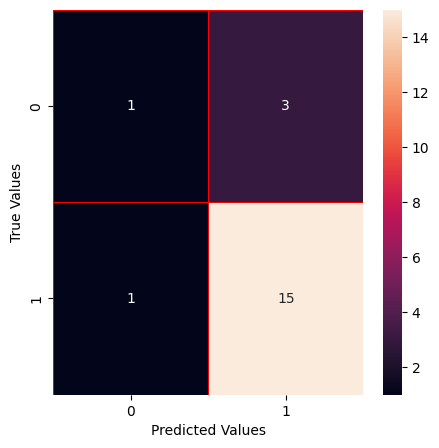

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 5: 0.8


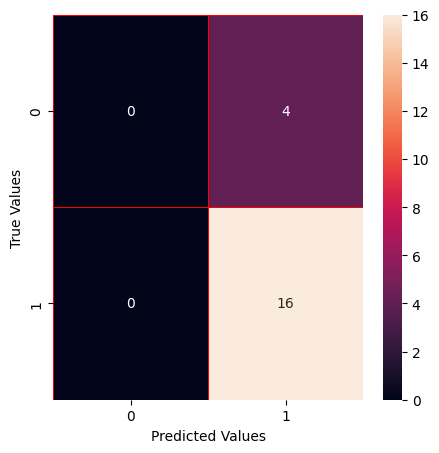

In [ ]:
# KNN Classification!
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.8


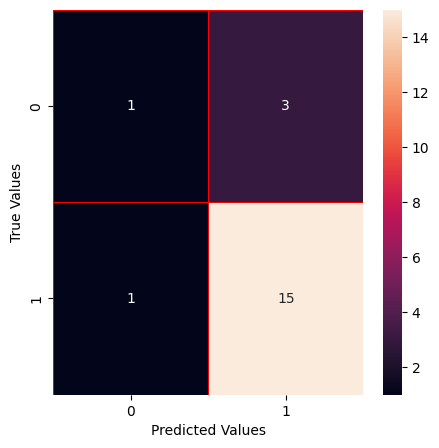

In [ ]:
# SVM!
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.8


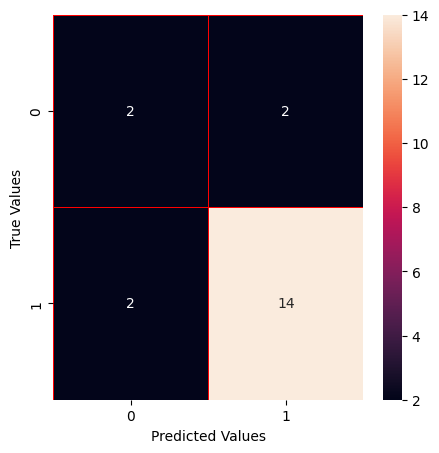

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Decision Tree Classification Score:  0.65


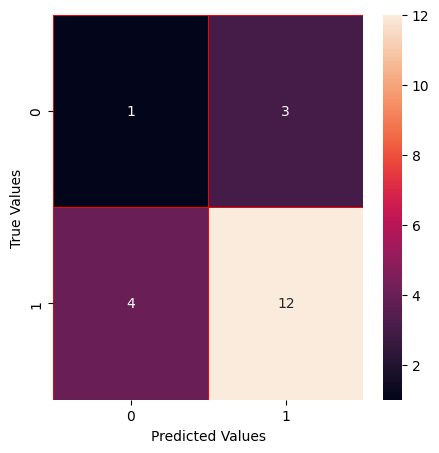

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Random Forest Classification Score:  0.75


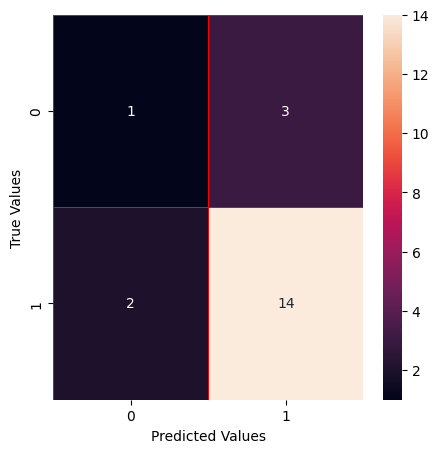

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
method_names.append("Random Forest")
method_scores.append(rand_forest.score(x_test,y_test))

y_pred = rand_forest.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

**ЗАКЛЮЧЕНИЕ**

После завершения всех рассчетов, выведем диаграмму значений методов


Text(0, 0.5, 'Method Score')

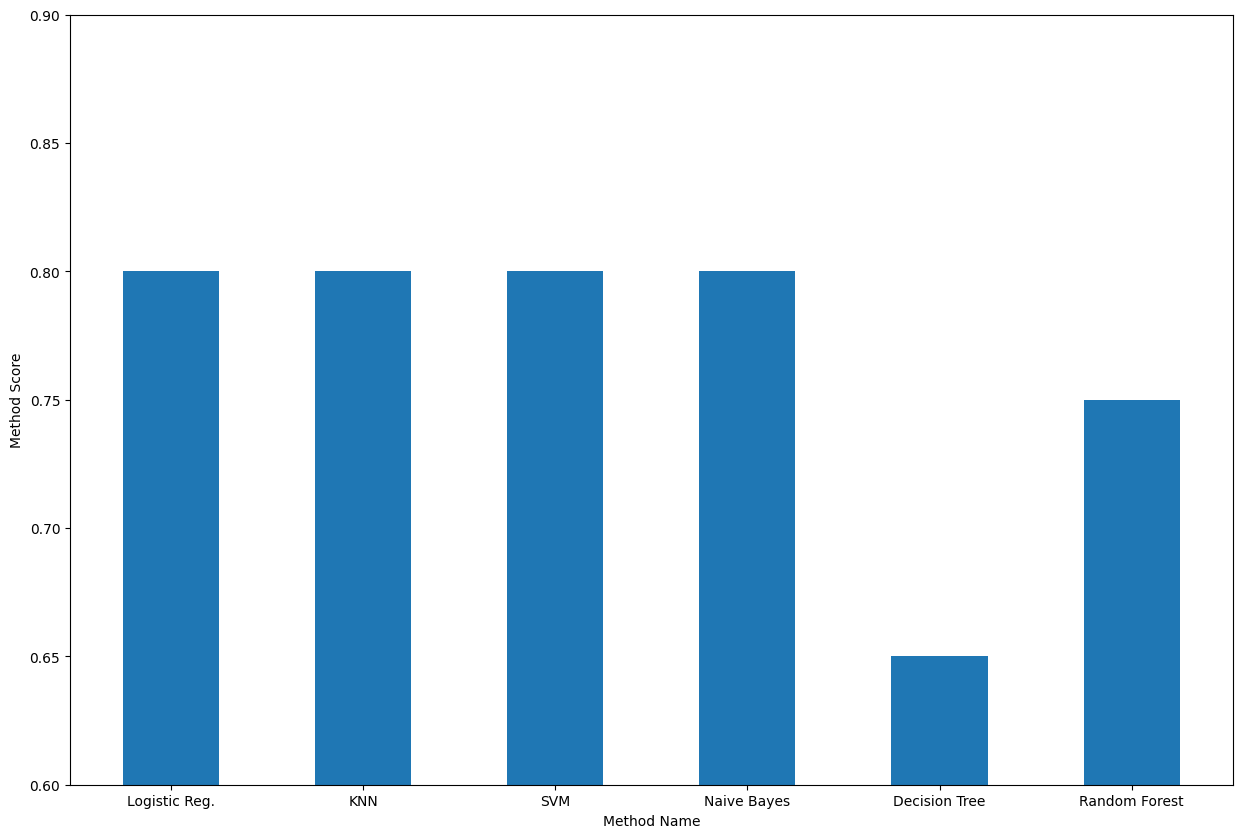

In [27]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

Как видно из графика. все методы (за исключением "Random Forest" и "Decision Tree") показали одинаковый результат. Скорее всего данное поведение связано с достаточно малым количеством исследований. Как развитие для более углубленного изучения проблематики рекомендую провести исследование нейросетями.